# Cassava leaf multi classification using Transfer Learning

This notebook apply multi classification task on leaf images using transfer learning from tensorflow hub. The data is from kaggle competition : https://www.kaggle.com/c/cassava-leaf-disease-classification/overview/description

* In this project we will run 2 experiment. First, with 50% data and then with full data.
* The metric we will try to improve is accuracy.
* We believe this project is highly feasible and important, because it will automate the existing manual method to inspect visually and diagnose the plants. And of course it will reduce the cost of prediction. 

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('../input/cassava-leaf-disease-classification/train.csv')
train_df

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3
...,...,...
21392,999068805.jpg,3
21393,999329392.jpg,3
21394,999474432.jpg,1
21395,999616605.jpg,4


In [3]:
train_df['label'].value_counts()

3    13158
4     2577
2     2386
1     2189
0     1087
Name: label, dtype: int64

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21397 entries, 0 to 21396
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  21397 non-null  object
 1   label     21397 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 334.5+ KB


In [5]:
# create function to make new column based on image category
def label_cat(row):
   if row['label'] == 0 :
      return 'Cassava Bacterial Blight (CBB)'
   if row['label'] == 1:
      return 'Cassava Brown Streak Disease (CBSD)'
   if row['label'] == 2 :
      return 'Cassava Green Mottle (CGM)'
   if row['label'] == 3:
      return 'Cassava Mosaic Disease (CMD)'
   else:
      return 'Healthy'

In [6]:
train_df.apply(lambda row: label_cat(row), axis=1)

0             Cassava Bacterial Blight (CBB)
1               Cassava Mosaic Disease (CMD)
2        Cassava Brown Streak Disease (CBSD)
3        Cassava Brown Streak Disease (CBSD)
4               Cassava Mosaic Disease (CMD)
                        ...                 
21392           Cassava Mosaic Disease (CMD)
21393           Cassava Mosaic Disease (CMD)
21394    Cassava Brown Streak Disease (CBSD)
21395                                Healthy
21396                                Healthy
Length: 21397, dtype: object

In [7]:
train_df['category'] = train_df.apply(lambda row: label_cat(row), axis=1)
train_df

,image_id,label,category
0,1000015157.jpg,0,Cassava Bacterial Blight (CBB)
1,1000201771.jpg,3,Cassava Mosaic Disease (CMD)
2,100042118.jpg,1,Cassava Brown Streak Disease (CBSD)
3,1000723321.jpg,1,Cassava Brown Streak Disease (CBSD)
4,1000812911.jpg,3,Cassava Mosaic Disease (CMD)
...,...,...,...
21392,999068805.jpg,3,Cassava Mosaic Disease (CMD)
21393,999329392.jpg,3,Cassava Mosaic Disease (CMD)
21394,999474432.jpg,1,Cassava Brown Streak Disease (CBSD)
21395,999616605.jpg,4,Healthy


In [8]:
train_df.category.value_counts()

Cassava Mosaic Disease (CMD)           13158
Healthy                                 2577
Cassava Green Mottle (CGM)              2386
Cassava Brown Streak Disease (CBSD)     2189
Cassava Bacterial Blight (CBB)          1087
Name: category, dtype: int64

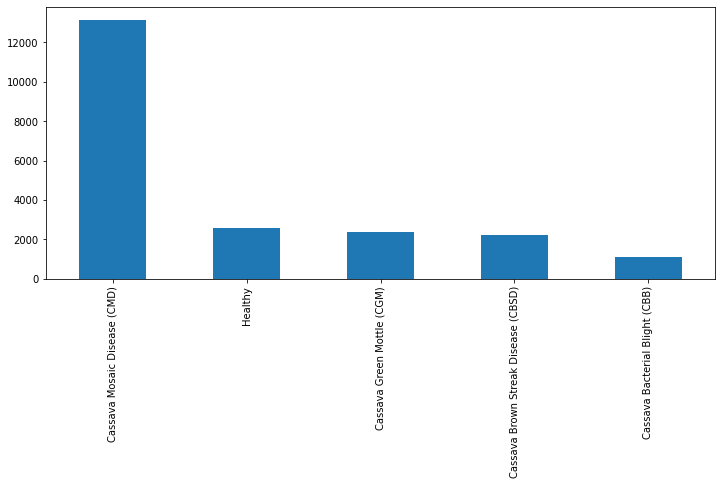

In [9]:
train_df.category.value_counts().plot.bar(figsize=(12,5));

In [10]:
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

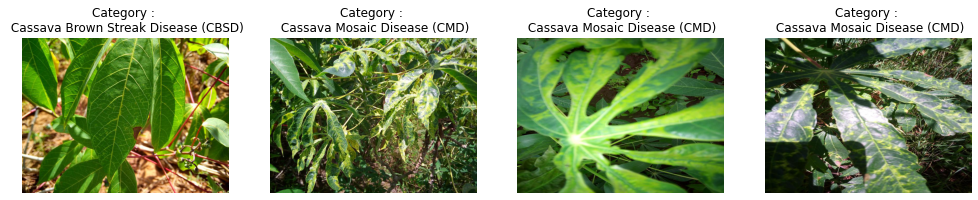

In [11]:
# view random training images
plt.figure(figsize=(17,9))
for i in range(4):
    ax = plt.subplot(1,4,i+1)
    random_image = random.sample(os.listdir("../input/cassava-leaf-disease-classification/train_images"), 1)
    img = mpimg.imread("../input/cassava-leaf-disease-classification/train_images" + "/" + random_image[0])
    category = train_df['category'].loc[train_df['image_id'] == random_image[0]].item()
    plt.imshow(img)
    plt.title(f"Category : \n {category}")
    plt.axis('off');

In [12]:
# get all training images filenames
filenames = ["../input/cassava-leaf-disease-classification/train_images/" + name 
             for name in train_df.image_id]
filenames[:10]

['../input/cassava-leaf-disease-classification/train_images/1000015157.jpg',
 '../input/cassava-leaf-disease-classification/train_images/1000201771.jpg',
 '../input/cassava-leaf-disease-classification/train_images/100042118.jpg',
 '../input/cassava-leaf-disease-classification/train_images/1000723321.jpg',
 '../input/cassava-leaf-disease-classification/train_images/1000812911.jpg',
 '../input/cassava-leaf-disease-classification/train_images/1000837476.jpg',
 '../input/cassava-leaf-disease-classification/train_images/1000910826.jpg',
 '../input/cassava-leaf-disease-classification/train_images/1001320321.jpg',
 '../input/cassava-leaf-disease-classification/train_images/1001723730.jpg',
 '../input/cassava-leaf-disease-classification/train_images/1001742395.jpg']

In [13]:
import os
if len(os.listdir("../input/cassava-leaf-disease-classification/train_images/")) == len(filenames):
  print("Filenames match actual amount of files!!! Proceed.")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!!! Proceed.


In [14]:
import numpy as np
labels = np.array(train_df.category)
labels

array(['Cassava Bacterial Blight (CBB)', 'Cassava Mosaic Disease (CMD)',
       'Cassava Brown Streak Disease (CBSD)', ...,
       'Cassava Brown Streak Disease (CBSD)', 'Healthy', 'Healthy'],
      dtype=object)

In [15]:
len(labels)

21397

In [16]:
# see if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories!")

Number of labels matches number of filenames!


In [17]:
disease_categories = np.unique(labels)
disease_categories

array(['Cassava Bacterial Blight (CBB)',
       'Cassava Brown Streak Disease (CBSD)',
       'Cassava Green Mottle (CGM)', 'Cassava Mosaic Disease (CMD)',
       'Healthy'], dtype=object)

In [18]:
print(labels[89])
labels[89] == disease_categories

Cassava Mosaic Disease (CMD)


array([False, False, False,  True, False])

In [19]:
boolean_labels = [label == disease_categories for label in labels]
boolean_labels[:10]

[array([ True, False, False, False, False]),
 array([False, False, False,  True, False]),
 array([False,  True, False, False, False]),
 array([False,  True, False, False, False]),
 array([False, False, False,  True, False]),
 array([False, False, False,  True, False]),
 array([False, False,  True, False, False]),
 array([ True, False, False, False, False]),
 array([False, False, False, False,  True]),
 array([False, False, False,  True, False])]

In [20]:
train_df['label']

0        0
1        3
2        1
3        1
4        3
        ..
21392    3
21393    3
21394    1
21395    4
21396    4
Name: label, Length: 21397, dtype: int64

# Create our own validation set

In [21]:
X = filenames
y = train_df['label'].astype('int32')

In [22]:
len(X), len(y)

(21397, 21397)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X[:10000], y[:10000], test_size=0.2, random_state=42)
len(X_train), len(X_val), len(y_train), len(y_val)

(8000, 2000, 8000, 2000)

In [25]:
X_train[:5], y_train[:5]

(['../input/cassava-leaf-disease-classification/train_images/2639460445.jpg',
  '../input/cassava-leaf-disease-classification/train_images/1275221941.jpg',
  '../input/cassava-leaf-disease-classification/train_images/1291761689.jpg',
  '../input/cassava-leaf-disease-classification/train_images/2087123075.jpg',
  '../input/cassava-leaf-disease-classification/train_images/2194170986.jpg'],
 9254    2
 1561    1
 1670    3
 6087    3
 6669    3
 Name: label, dtype: int32)

In [26]:
import tensorflow as tf

In [27]:
IMG_SIZE = 224
def preprocess_img(image_path, img_size=IMG_SIZE):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
    return image

In [28]:
def get_image_label(image_path, label):
    image = preprocess_img(image_path)
    return image, label

In [29]:
y[9]

3

In [30]:
tf.constant(y[9])

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [31]:
BATCH_SIZE = 32
train_data = tf.data.Dataset.from_tensor_slices((tf.constant(X_train), tf.constant(y_train)))
train_data = train_data.shuffle(buffer_size=len(X_train)).map(get_image_label).batch(BATCH_SIZE)
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

In [32]:
valid_data = tf.data.Dataset.from_tensor_slices((tf.constant(X_val), tf.constant(y_val)))
valid_data = valid_data.map(get_image_label).batch(BATCH_SIZE)
valid_data

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

In [33]:
import datetime
from tensorflow.keras.callbacks import TensorBoard

In [34]:
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = TensorBoard(log_dir=log_dir)
  print(f"Saving tensorboard log files to: {log_dir}.")
  return tensorboard_callback

In [35]:
# set checkpoint path 
checkpoint_path = "/model_1_checkpoint/checkpoint"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, monitor="val_loss", save_best_only=True, save_weights_only=True, save_freq="epoch", verbose=1
)

In [36]:
# create early stopping callback 
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=3)

# Build Feature Extraction model

In [37]:
base_model = tf.keras.applications.EfficientNetB4(include_top=False)
base_model.trainable = False

71688192/71686520 [==============================] - 0s 0us/step


In [38]:
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="Global_2D_pooling_layer")(x)
x = tf.keras.layers.Dense(5)(x)
outputs = tf.keras.layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=["accuracy"])

In [39]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb4 (Functional)  (None, None, None, 1792)  17673823  
_________________________________________________________________
Global_2D_pooling_layer (Glo (None, 1792)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 8965      
_________________________________________________________________
softmax_float32 (Activation) (None, 5)                 0         
Total params: 17,682,788
Trainable params: 8,965
Non-trainable params: 17,673,823
_________________________________________________________________


In [40]:
history = model.fit(train_data, epochs=100, steps_per_epoch=len(train_data), validation_data=valid_data, 
                    validation_steps=int(0.25*len(valid_data)), callbacks=[
                                                                          create_tensorboard_callback(dir_name='tensorboard_cassava', 
                                                                                                      experiment_name='model0'),
                    checkpoint_callback, early_stopping])

Saving tensorboard log files to: tensorboard_cassava/model0/20210711-135626.
Epoch 1/100
250/250 [==============================] - 93s 323ms/step - loss: 0.9938 - accuracy: 0.6254 - val_loss: 0.8437 - val_accuracy: 0.7042

Epoch 00001: val_loss improved from inf to 0.84369, saving model to /model_1_checkpoint/checkpoint
Epoch 2/100
250/250 [==============================] - 38s 151ms/step - loss: 0.7624 - accuracy: 0.7158 - val_loss: 0.7927 - val_accuracy: 0.7083

Epoch 00002: val_loss improved from 0.84369 to 0.79274, saving model to /model_1_checkpoint/checkpoint
Epoch 3/100
250/250 [==============================] - 38s 151ms/step - loss: 0.7086 - accuracy: 0.7415 - val_loss: 0.7811 - val_accuracy: 0.7104

Epoch 00003: val_loss improved from 0.79274 to 0.78112, saving model to /model_1_checkpoint/checkpoint
Epoch 4/100
250/250 [==============================] - 38s 151ms/step - loss: 0.6917 - accuracy: 0.7441 - val_loss: 0.7767 - val_accuracy: 0.7083

Epoch 00004: val_loss improved

In [41]:
result_model = model.evaluate(valid_data)

63/63 [==============================] - 17s 265ms/step - loss: 0.6943 - accuracy: 0.7510


In [42]:
result_model

[0.6942663192749023, 0.7509999871253967]

In [43]:
# plot validation and training curves separately
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(len(history.history['loss']))
    
    # plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()
    
    # plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()

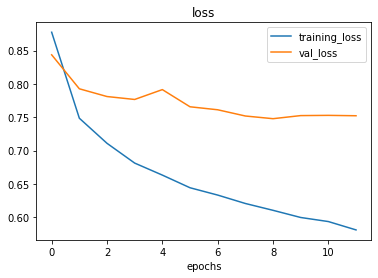

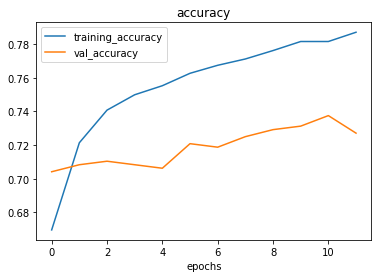

In [44]:
plot_loss_curves(history)

# Build Fine Tuning model

In [45]:
model.layers

In [46]:
len(model.layers[1].trainable_variables)

0

In [47]:
base_model.trainable = True
len(model.layers[1].trainable_variables)

416

In [48]:
model.compile(loss="sparse_categorical_crossentropy", 
             optimizer=tf.keras.optimizers.Adam(lr=0.0001), 
             metrics=["accuracy"])

In [49]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb4 (Functional)  (None, None, None, 1792)  17673823  
_________________________________________________________________
Global_2D_pooling_layer (Glo (None, 1792)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 8965      
_________________________________________________________________
softmax_float32 (Activation) (None, 5)                 0         
Total params: 17,682,788
Trainable params: 17,557,581
Non-trainable params: 125,207
_________________________________________________________________


In [50]:
history_fine_tune = model.fit(train_data, epochs=100, validation_data=valid_data, validation_steps=int(0.25*len(valid_data)), 
                             callbacks=[
                                 create_tensorboard_callback(dir_name="tensorboard_cassava", experiment_name="model_fine_tune"), 
                                 checkpoint_callback, early_stopping
                             ])

Saving tensorboard log files to: tensorboard_cassava/model_fine_tune/20210711-140517.
Epoch 1/100
250/250 [==============================] - 154s 556ms/step - loss: 0.6468 - accuracy: 0.7612 - val_loss: 0.5624 - val_accuracy: 0.8083

Epoch 00001: val_loss improved from 0.74790 to 0.56244, saving model to /model_1_checkpoint/checkpoint
Epoch 2/100
250/250 [==============================] - 134s 535ms/step - loss: 0.3293 - accuracy: 0.8851 - val_loss: 0.6032 - val_accuracy: 0.8000

Epoch 00002: val_loss did not improve from 0.56244
Epoch 3/100
250/250 [==============================] - 133s 531ms/step - loss: 0.1077 - accuracy: 0.9646 - val_loss: 0.6975 - val_accuracy: 0.8104

Epoch 00003: val_loss did not improve from 0.56244
Epoch 4/100
250/250 [==============================] - 133s 532ms/step - loss: 0.0371 - accuracy: 0.9894 - val_loss: 0.8821 - val_accuracy: 0.8083

Epoch 00004: val_loss did not improve from 0.56244


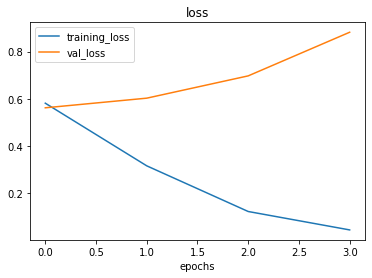

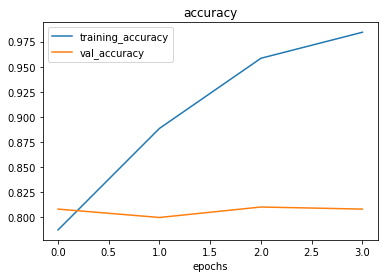

In [51]:
plot_loss_curves(history_fine_tune)

In [52]:
result_fine_tune = model.evaluate(valid_data)

63/63 [==============================] - 9s 141ms/step - loss: 0.8963 - accuracy: 0.8075


# Build model on the full data

In [53]:
len(filenames)

21397

In [54]:
len(train_data)

250

In [55]:
X_train_full, X_val_full, y_train_full, y_val_full = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train_full), len(X_val_full), len(y_train_full), len(y_val_full)

(17117, 4280, 17117, 4280)

In [56]:
BATCH_SIZE = 32
train_data_full = tf.data.Dataset.from_tensor_slices((tf.constant(X_train_full), tf.constant(y_train_full)))
train_data_full = train_data_full.shuffle(buffer_size=len(X_train_full)).map(get_image_label).batch(BATCH_SIZE)
valid_data_full = tf.data.Dataset.from_tensor_slices((tf.constant(X_val_full), tf.constant(y_val_full)))
valid_data_full = valid_data_full.map(get_image_label).batch(BATCH_SIZE)

In [57]:
history_full_data_b4 = model.fit(train_data_full, epochs=100, steps_per_epoch=len(train_data_full), validation_data=valid_data_full, 
                    validation_steps=int(0.25*len(valid_data_full)), callbacks=[
                                                                          create_tensorboard_callback(dir_name='tensorboard_cassava', 
                                                                                                      experiment_name='model_full_data_b4'),
                    checkpoint_callback, early_stopping])

Saving tensorboard log files to: tensorboard_cassava/model_full_data_b4/20210711-141442.
Epoch 1/100
535/535 [==============================] - 294s 549ms/step - loss: 0.3905 - accuracy: 0.8716 - val_loss: 0.4078 - val_accuracy: 0.8580

Epoch 00001: val_loss improved from 0.56244 to 0.40784, saving model to /model_1_checkpoint/checkpoint
Epoch 2/100
535/535 [==============================] - 289s 540ms/step - loss: 0.1693 - accuracy: 0.9445 - val_loss: 0.4940 - val_accuracy: 0.8551

Epoch 00002: val_loss did not improve from 0.40784
Epoch 3/100
535/535 [==============================] - 286s 535ms/step - loss: 0.0597 - accuracy: 0.9793 - val_loss: 0.5702 - val_accuracy: 0.8835

Epoch 00003: val_loss did not improve from 0.40784
Epoch 4/100
535/535 [==============================] - 289s 540ms/step - loss: 0.0286 - accuracy: 0.9903 - val_loss: 0.6575 - val_accuracy: 0.8646

Epoch 00004: val_loss did not improve from 0.40784


In [58]:
result_full_b4 = model.evaluate(valid_data_full)

134/134 [==============================] - 28s 207ms/step - loss: 0.6196 - accuracy: 0.8722


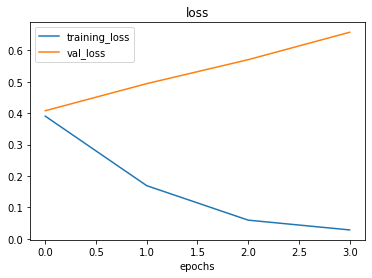

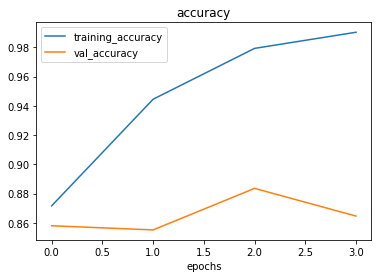

In [59]:
plot_loss_curves(history_full_data_b4)

In [75]:
valid_data_full

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

# Save model

In [60]:
model.save("./saved_model_b4_cassava/model_b4.h5")

# Make Prediction on validation set

In [61]:
len(valid_data_full)

134

In [62]:
# using fine tuning efficientnetb4() model
predictions = model.predict(valid_data_full, verbose=1)

134/134 [==============================] - 22s 145ms/step


In [63]:
predictions.argmax(axis=1)

array([4, 3, 3, ..., 3, 3, 3])

In [64]:
pred_labels = disease_categories[predictions.argmax(axis=1)]
pred_labels

array(['Healthy', 'Cassava Mosaic Disease (CMD)',
       'Cassava Mosaic Disease (CMD)', ...,
       'Cassava Mosaic Disease (CMD)', 'Cassava Mosaic Disease (CMD)',
       'Cassava Mosaic Disease (CMD)'], dtype=object)

In [65]:
len(pred_labels)

4280

In [66]:
submission_file = pd.read_csv(os.path.join('../input/cassava-leaf-disease-classification/sample_submission.csv'))
submission_file

,image_id,label
0,2216849948.jpg,4


In [67]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
test_generator= test_datagen.flow_from_dataframe(submission_file,
                         directory = os.path.join('../input/cassava-leaf-disease-classification/test_images'),
                         x_col = "image_id",
                         target_size = (224, 224),
                         class_mode=None)
pred = model.predict_generator(test_generator, verbose=1)

Found 1 validated image filenames.


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


1/1 [==============================] - 3s 3s/step


In [68]:
pred_test = pred.argmax()
pred_test

3

In [69]:
submission = pd.DataFrame({ 'image_id': submission_file.image_id, 'label': pred_test })
submission.to_csv("submission.csv", index=False)

In [70]:
submission

,image_id,label
0,2216849948.jpg,3


**Notes:**

It looks fine tuned `EfficientNetB4()` model from tensorflow perform the best accuracy result compared to only using 50% data. But training on the full data with 87.22% accuracy on the vaildation dataset takes almost 3 times longer than training with half dataset.  